# Comprehensive exploration and visualization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "C:/Users/Jameel shaik/Documents/Santander Product Recommendation"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import  train_test_split
from sklearn import metrics
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from collections import defaultdict
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Project final Version-17th Dec.ipynb
Project final Version.ipynb
Santander Product Recommendation- Faculty Version.ipynb
Santander Product Recommendation_datasets.rar
Santander-Can you pair products with people.3gpp
project v2.ipynb
project v3.ipynb
project vrsion-1.ipynb
sample_submission.csv
test_ver2.csv
train_ver2.csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Calibrate the number of rows to not crash the kernel 
limit_rows   = 50000
df           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
test           = pd.read_csv("test_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)

# Format to datetime data,maybe the month of the year is important to purchase

df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")
# Not very sure just to keep with unique_ids 'cause principal id is fecha_dato + ncodpers and if we
# eliminate repeated ncodpers we lose some important information.
#We take unique_ids and unique fecha_datos just to play forward.
unique_ids   = pd.Series(df["ncodpers"].unique())
unique_fecha_dato = df["fecha_dato"].unique()
df.head()


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
0,1/28/2015,1050622,N,ES,H,23.0,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,1/28/2015,1050492,N,ES,V,25.0,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,1/28/2015,1050571,N,ES,H,23.0,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,1/28/2015,1050915,N,ES,H,37.0,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,1/28/2015,1050732,N,ES,H,23.0,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1


# Data cleaning

In [3]:
train_unique_customers = set(df.ncodpers.unique())
test_unique_customers = set(test.ncodpers.unique())
print("Number of customers in train : ", len(train_unique_customers))
print("Number of customers in test : ", len(test_unique_customers))
print("Number of common customers : ", len(train_unique_customers.intersection(test_unique_customers)))

Number of customers in train :  48695
Number of customers in test :  38171
Number of common customers :  2237


In [4]:
# Change datatype
df["age"]   = pd.to_numeric(df["age"], errors="coerce") 
df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 
df["indrel_1mes"]   = pd.to_numeric(df["indrel_1mes"], errors="coerce") 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 49 columns):
fecha_dato               50000 non-null object
ncodpers                 50000 non-null int64
ind_empleado             49891 non-null object
pais_residencia          49891 non-null object
sexo                     49891 non-null object
age                      49891 non-null float64
fecha_alta               49891 non-null object
ind_nuevo                49891 non-null object
antiguedad               49891 non-null float64
indrel                   49891 non-null float64
ult_fec_cli_1t           90 non-null object
indrel_1mes              49452 non-null float64
tiprel_1mes              49456 non-null object
indresi                  49891 non-null object
indext                   49891 non-null object
conyuemp                 5 non-null object
canal_entrada            49317 non-null object
indfall                  49891 non-null object
tipodom                  49891 non-null float64
c

In [6]:
# Check how many missing values in every column
df.isnull().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado               109
pais_residencia            109
sexo                       109
age                        109
fecha_alta                 109
ind_nuevo                  109
antiguedad                 109
indrel                     109
ult_fec_cli_1t           49910
indrel_1mes                548
tiprel_1mes                544
indresi                    109
indext                     109
conyuemp                 49995
canal_entrada              683
indfall                    109
tipodom                    109
cod_prov                   340
nomprov                    340
ind_actividad_cliente      109
renta                    10375
segmento                   694
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [7]:
# Drop the columns with majority of missing values
df = df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [8]:
#Impute missing values in the income column 
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"})
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

In [9]:
df = df.dropna(axis=0)

In [10]:
df[df["antiguedad"]<0] = 0

In [11]:
# Add a new column of the total number of products per customer per month
df["tot_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce") 

In [12]:
df['pais_residencia'].describe() 

count     49072
unique        1
top          ES
freq      49072
Name: pais_residencia, dtype: object

In [13]:
df = df.loc[lambda df: df.pais_residencia == "ES", :]

# How about employee index?

In [14]:
df['ind_empleado'].value_counts()

N    49046
B       12
F        9
A        5
Name: ind_empleado, dtype: int64

In [15]:
df = df.loc[lambda df: df.ind_empleado == "N", :]

In [16]:
# Check how many missing values in every column
df.isnull().sum()

index                    0
fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
i

# Data Visualization ##

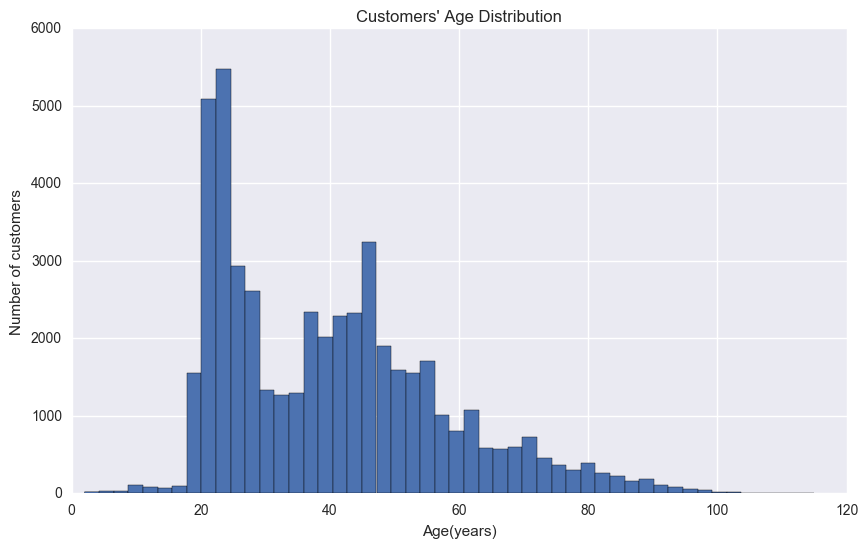

In [17]:

df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

In [18]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 90,"age"] = df.loc[(df.age >= 30) & (df.age <= 90),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

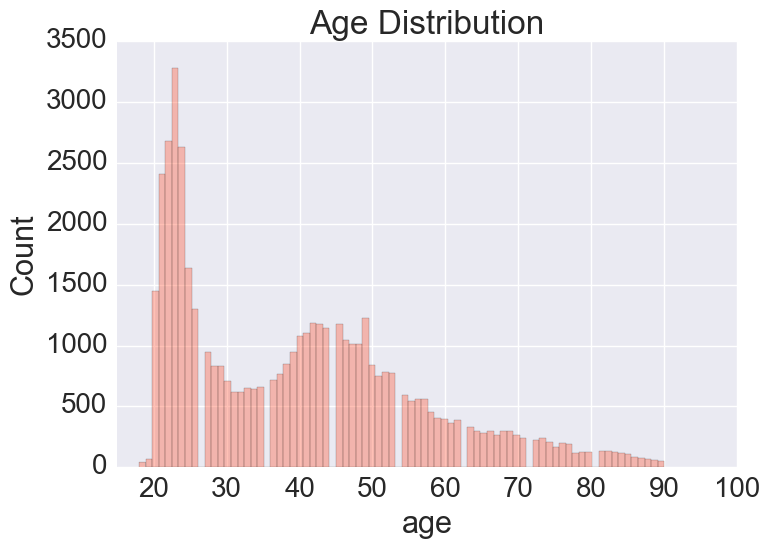

In [19]:
with sns.plotting_context("notebook",font_scale=2.0):
    sns.set_style("darkgrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))


# Customers attraction by channel
The channels through which the customers were attracted to join.

In [20]:
# Customers count by channel 
df['canal_entrada'].value_counts().head(15)

KHE    14760
KAT    11833
KFC    11300
KHQ     2213
KFA     1476
KHK      863
KHM      726
KHD      430
KHN      423
RED      302
KAG      301
KAS      274
KAY      260
KAA      239
KAB      226
Name: canal_entrada, dtype: int64

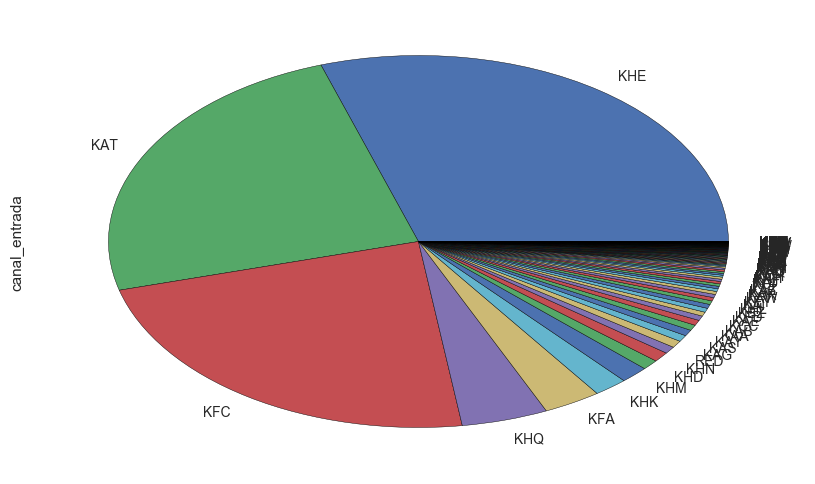

In [21]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

# Number of products by activity index and sex

In [22]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

In [23]:
df_a.head()

sexo                        H               V        
ind_actividad_cliente     0.0     1.0     0.0     1.0
ind_ahor_fin_ult1         1.0     0.0     2.0     1.0
ind_aval_fin_ult1         0.0     0.0     0.0     0.0
ind_cco_fin_ult1       7997.0  7276.0  7455.0  9483.0
ind_cder_fin_ult1         2.0     3.0     1.0    17.0
ind_cno_fin_ult1         26.0  1606.0    29.0  2347.0

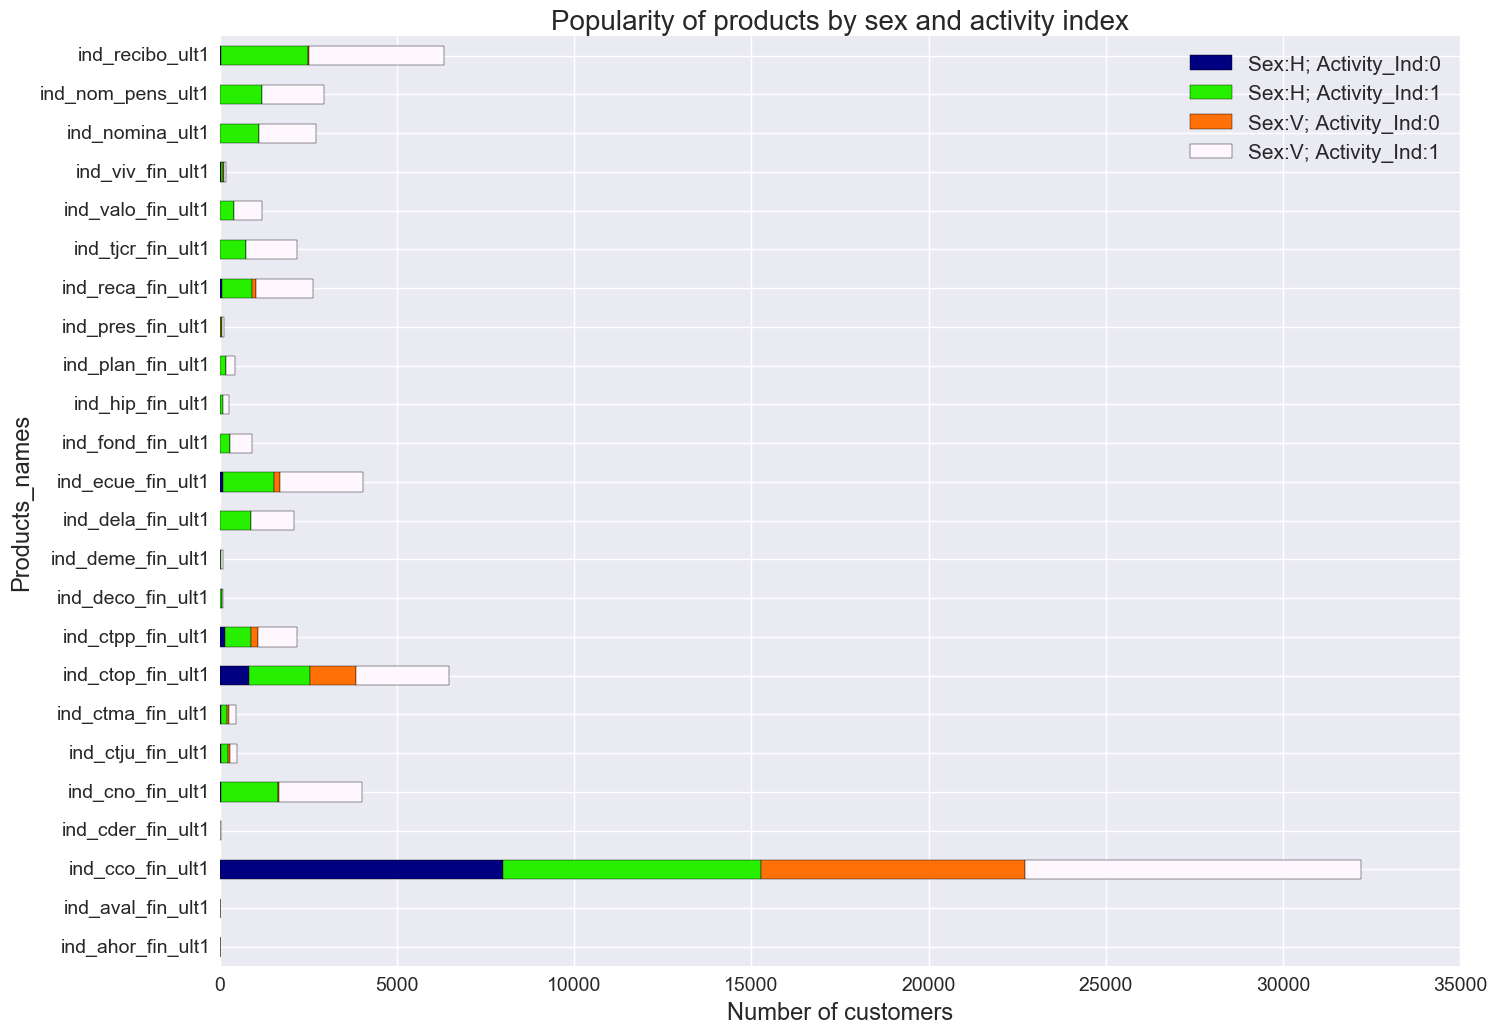

In [24]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [25]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

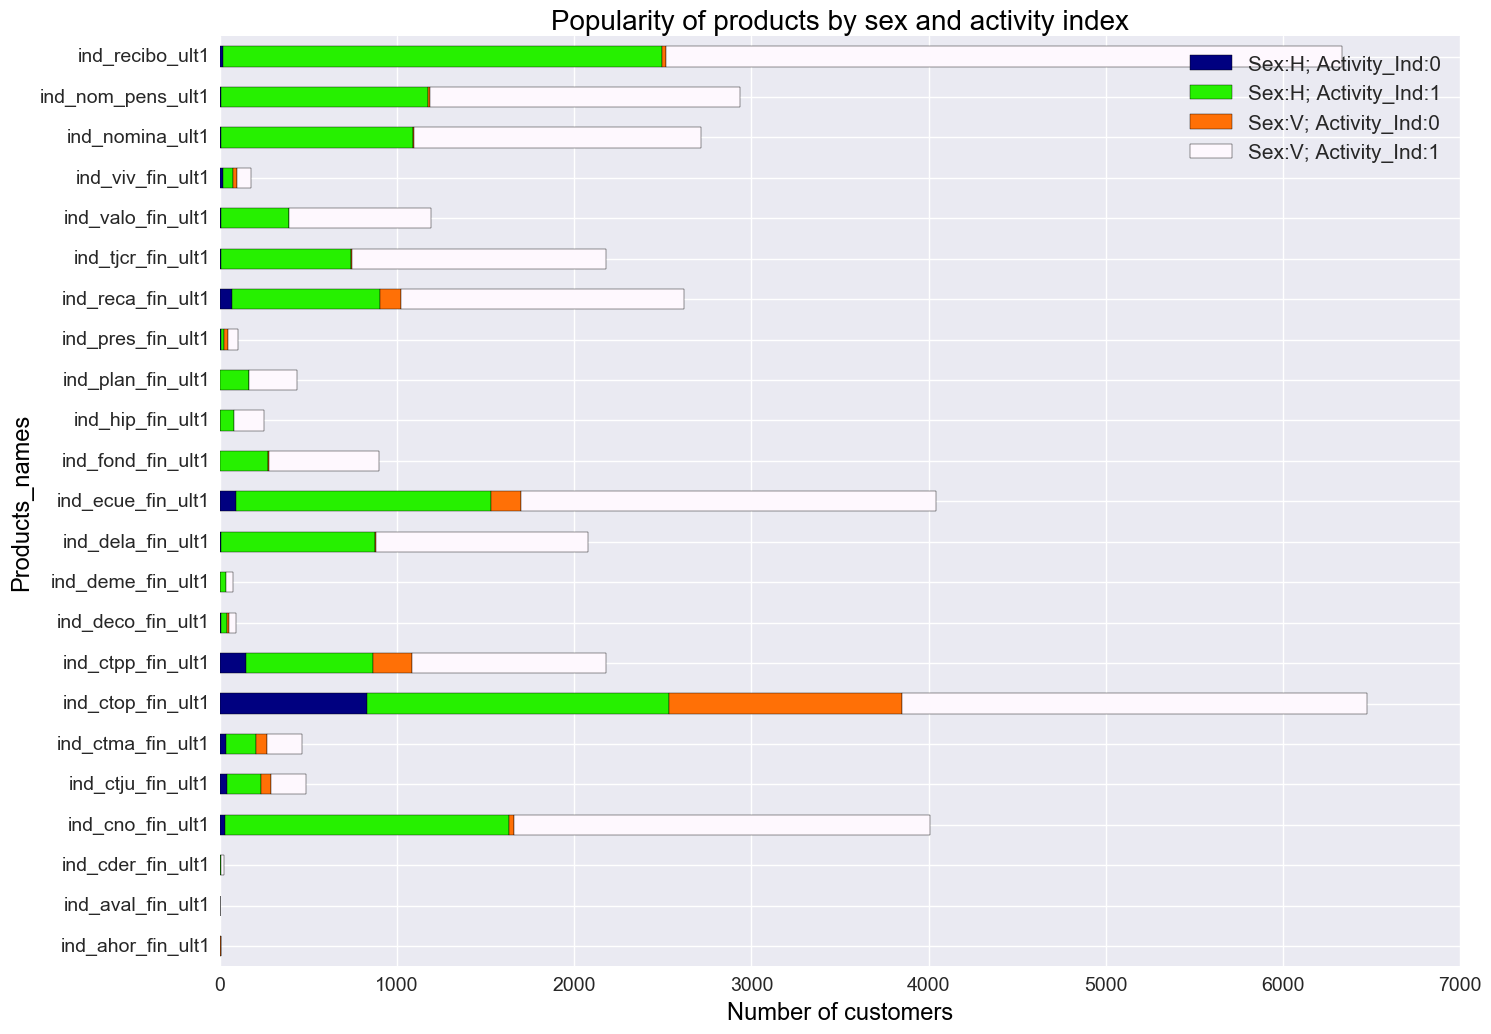

In [26]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [27]:
df["tot_products"].value_counts()

1.0     25822
0.0      9018
2.0      7006
3.0      2835
4.0      1586
5.0      1086
6.0       750
7.0       472
8.0       290
9.0       112
10.0       46
11.0       17
12.0        6
Name: tot_products, dtype: int64

#### Total number of products by income

In [28]:
df_a = (df.groupby(pd.cut(df['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [29]:
df_a["tot_products"]

renta
[0, 60000)           9079.0
[60000, 120000)     35439.0
[120000, 180000)    14567.0
[180000, 240000)     6403.0
[240000, inf)        6476.0
Name: tot_products, dtype: float64

In [30]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [31]:
df_a.head(10)

renta,"[0, 60000)","[60000, 120000)","[120000, 180000)","[180000, 240000)","[240000, inf)"
ind_ahor_fin_ult1,0.0,3.0,0.0,1.0,0.0
ind_aval_fin_ult1,0.0,0.0,0.0,0.0,0.0
ind_cco_fin_ult1,4873.0,17072.0,5764.0,2213.0,2289.0
ind_cder_fin_ult1,1.0,12.0,4.0,3.0,3.0
ind_cno_fin_ult1,487.0,1899.0,884.0,399.0,339.0
ind_ctju_fin_ult1,45.0,198.0,120.0,63.0,58.0
ind_ctma_fin_ult1,49.0,252.0,82.0,48.0,33.0
ind_ctop_fin_ult1,630.0,2994.0,1399.0,729.0,724.0
ind_ctpp_fin_ult1,195.0,979.0,522.0,217.0,267.0
ind_deco_fin_ult1,9.0,48.0,17.0,7.0,9.0


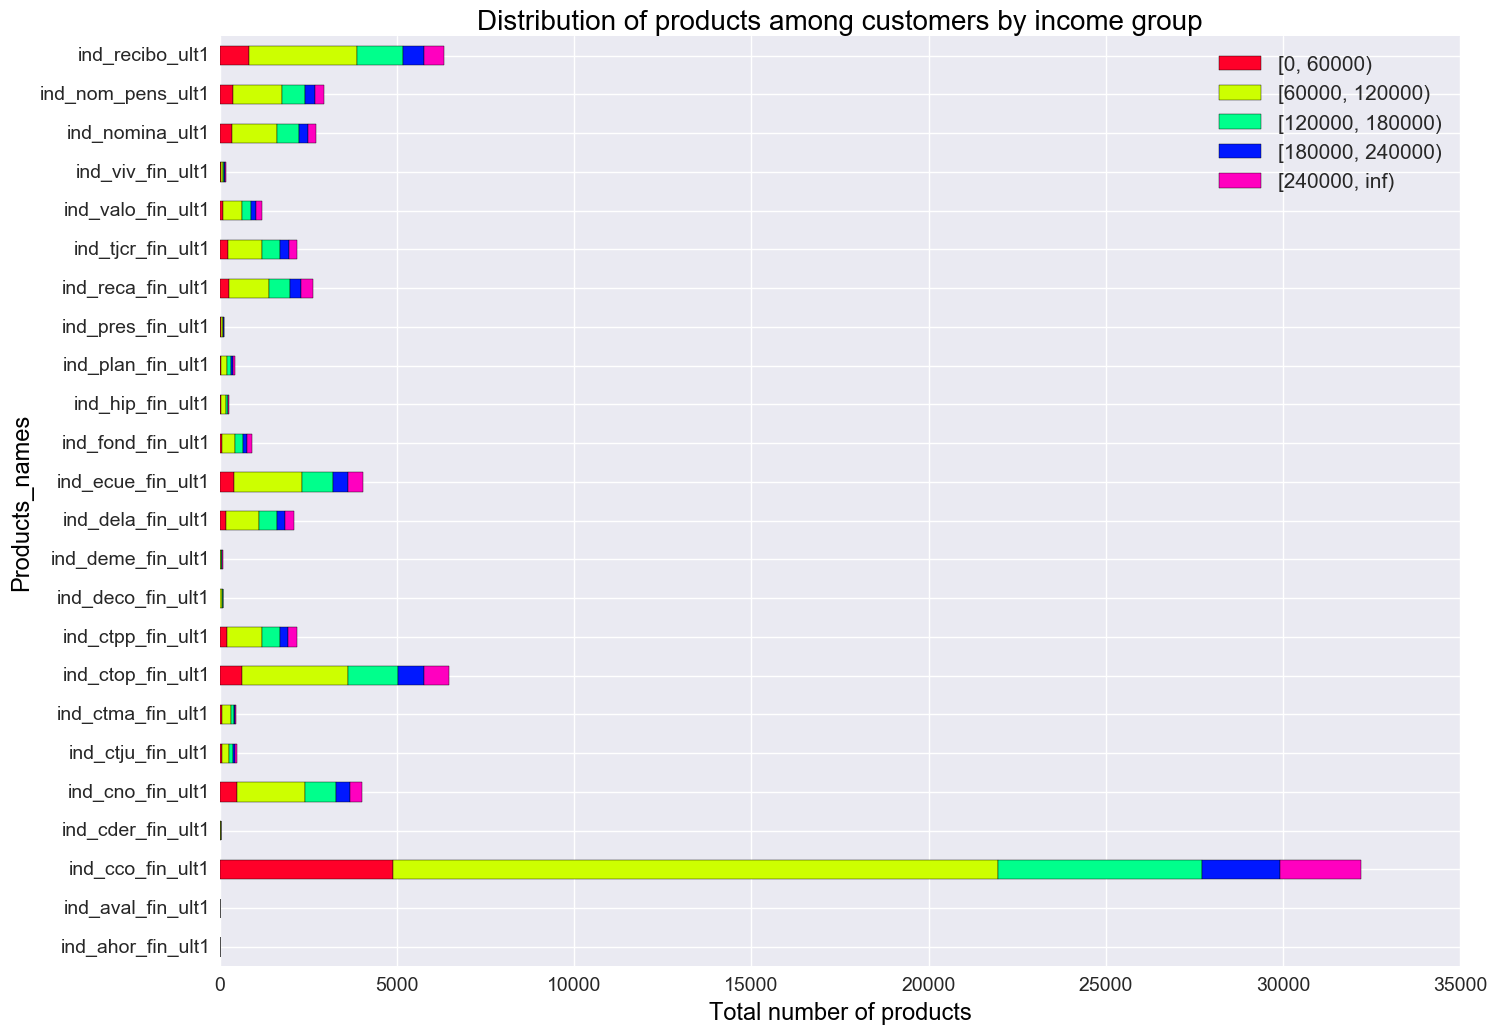

In [32]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [33]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

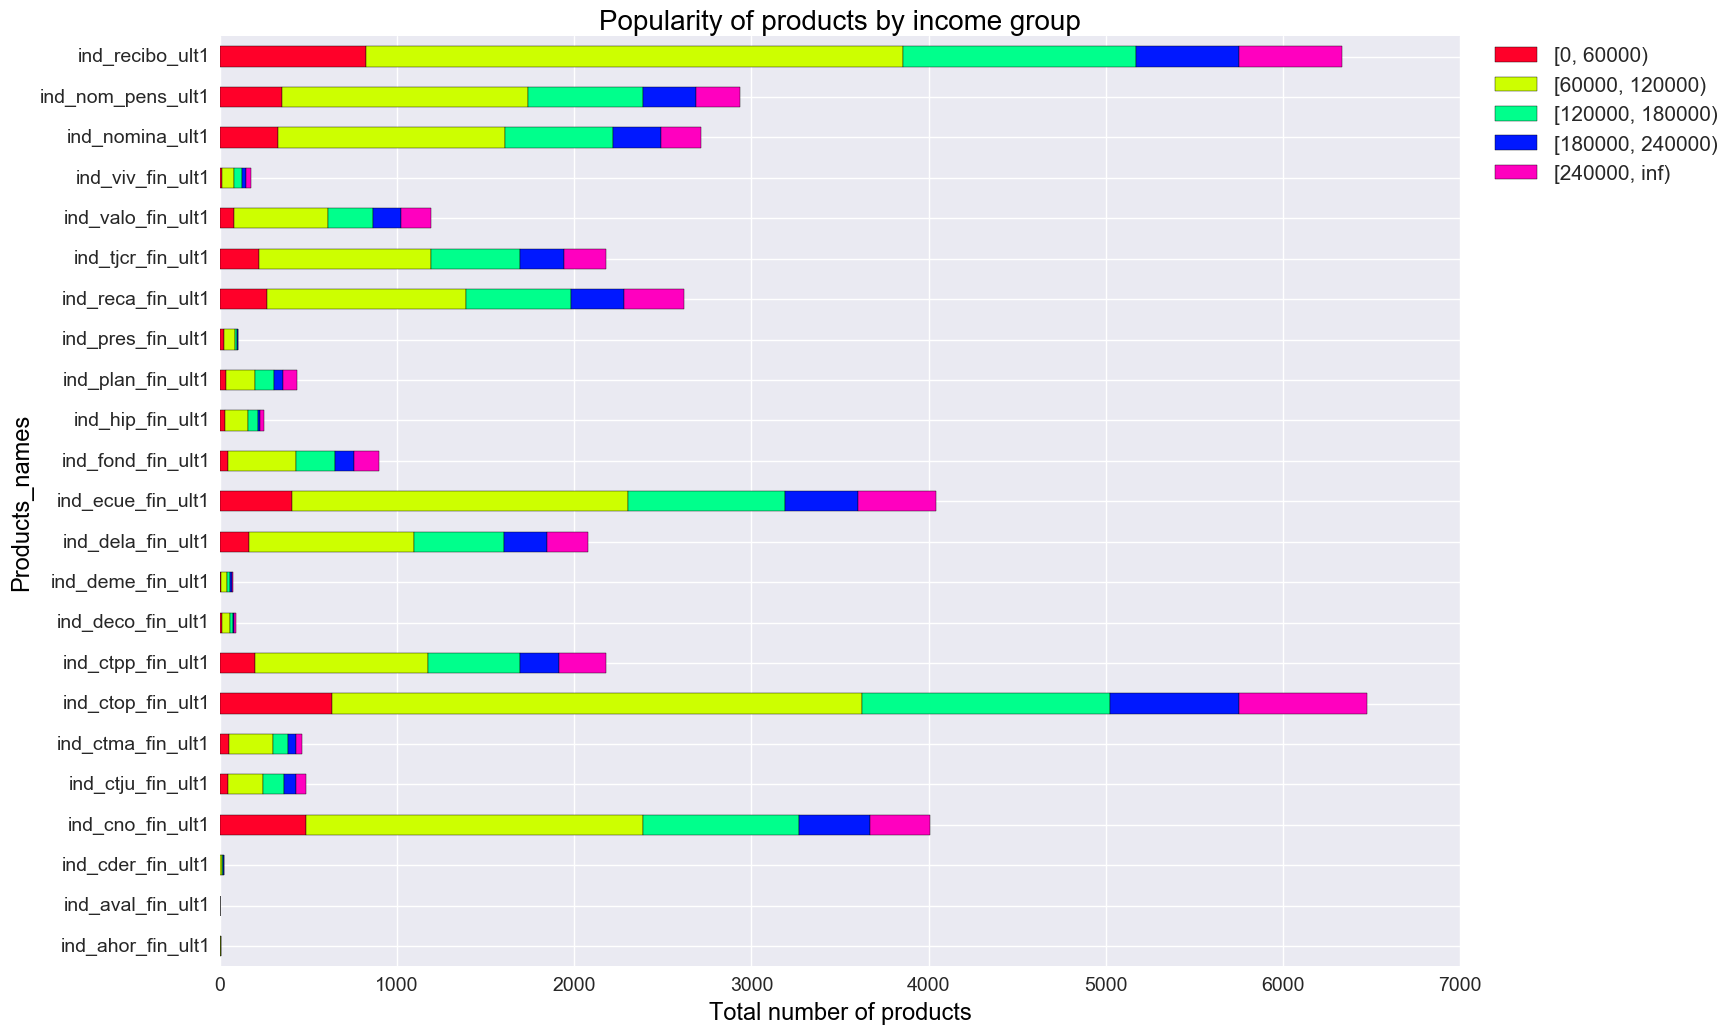

In [34]:
# Plot of product share for each income group; excluding the dominant product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

#### Let's check number of products by channels

In [35]:
df["canal_entrada"].value_counts().head(10)

KHE    14760
KAT    11833
KFC    11300
KHQ     2213
KFA     1476
KHK      863
KHM      726
KHD      430
KHN      423
RED      302
Name: canal_entrada, dtype: int64

In [36]:
# Let's extract the necessary columns for this step
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [37]:
# Let's subset the data to keep only the records from the five major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK"]
df_a = df_a.loc[df_a['canal_entrada'].isin(subset)]

In [38]:
df_a = df_a.groupby("canal_entrada").agg("sum")
df_a = df_a.T

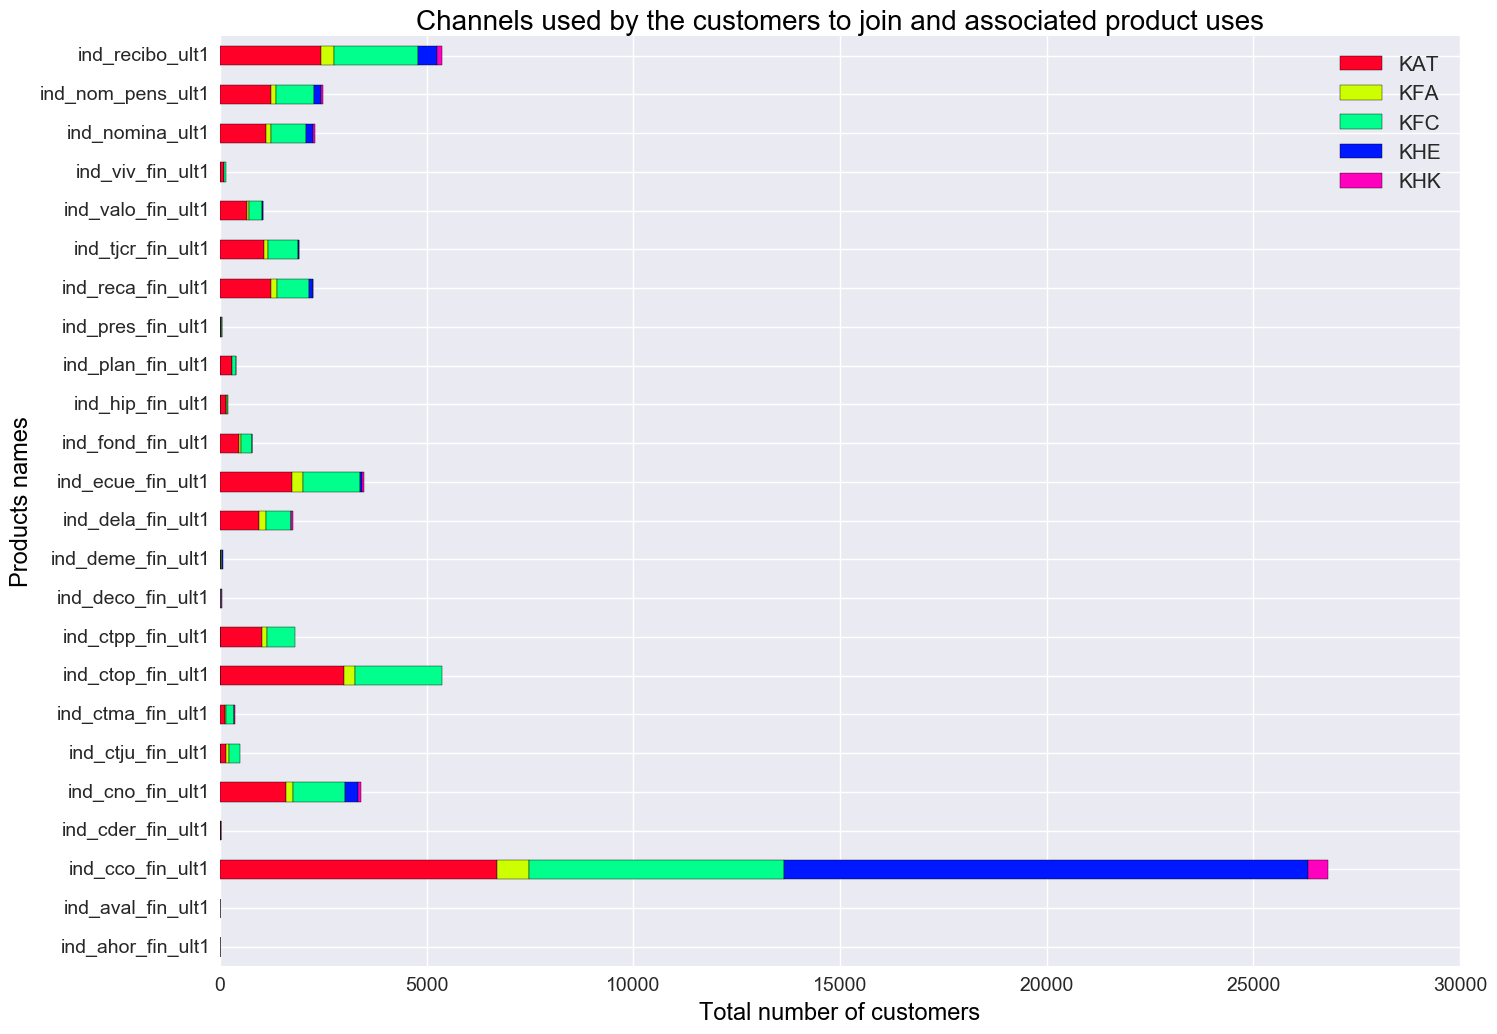

In [39]:
# Channels used by the customer to join and the purchased products
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [40]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

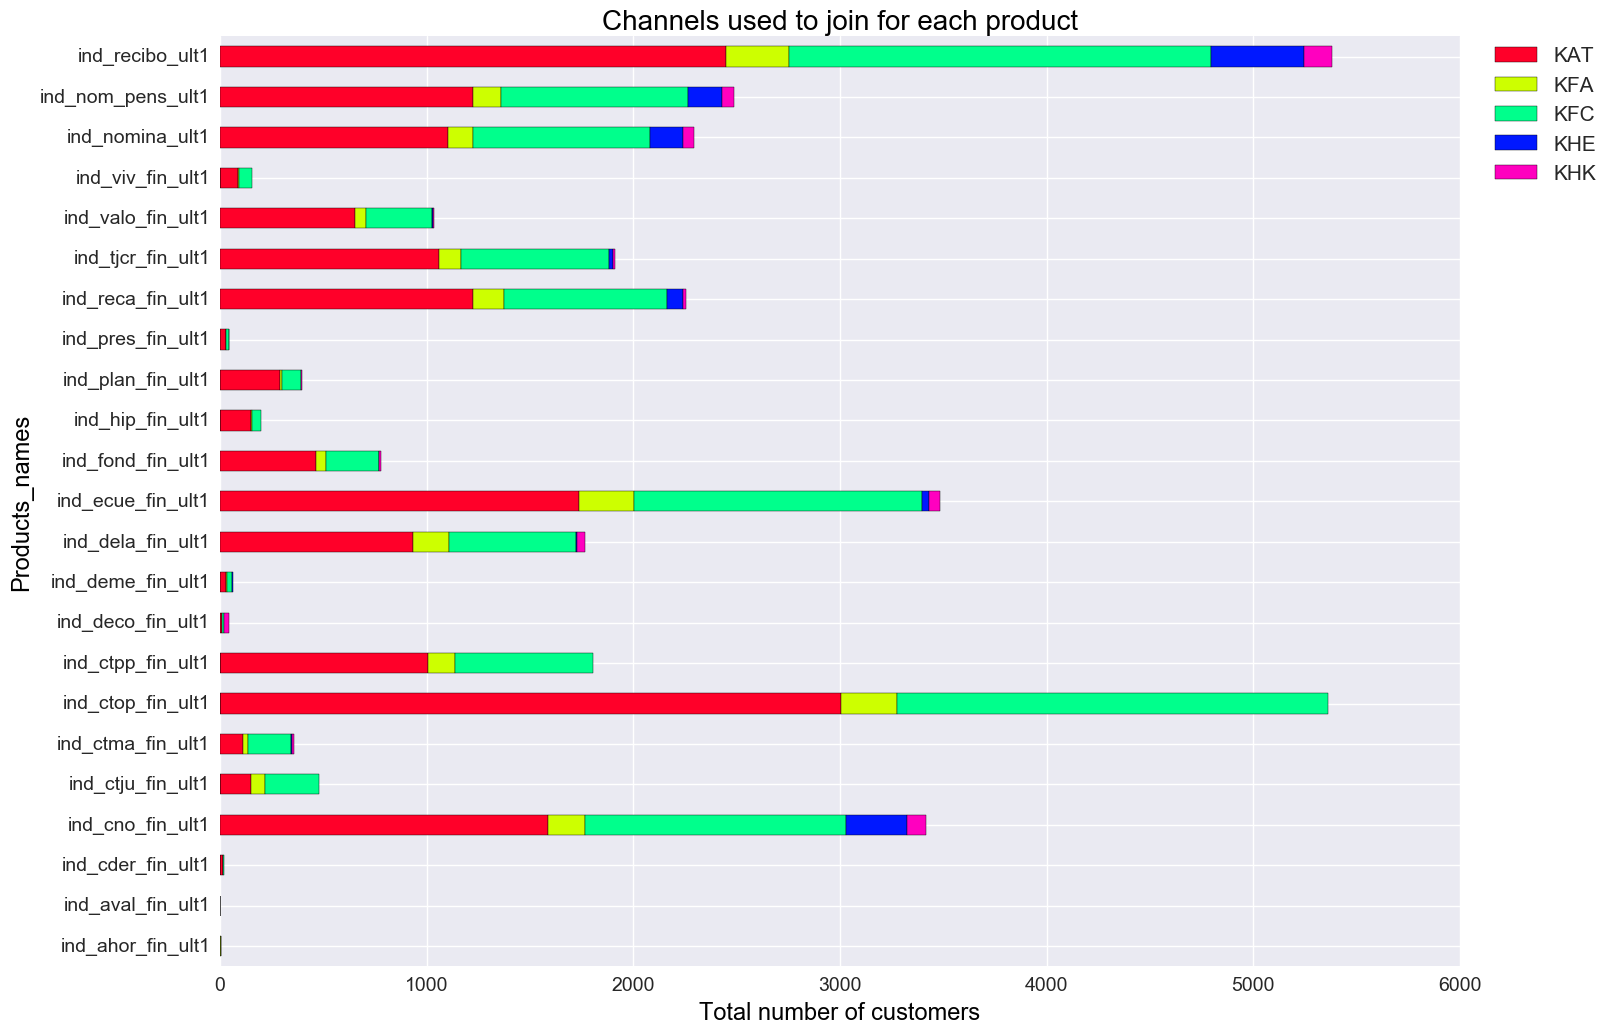

In [41]:
# Channels share distribution of each product, excluding the dominant product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used to join for each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["KAT", "KFA", "KFC", "KHE", "KHK"], prop={'size':15}, loc=1) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

### Drivers of customers choices

In [42]:
df_a = df.loc[:, ['age']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [43]:
df_a = (df_a.groupby(pd.cut(df_a['age'], [0,18,25,35,45,55, pd.np.inf], right=False))
                     .sum())

In [44]:
df_a.head()

,age,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
age,,,,,,,,,,,,,,,,,,,,,
"[0, 18)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[18, 25)",278991.0,0.0,0.0,9828.0,0.0,220.0,484.0,7.0,28.0,0.0,...,0.0,0.0,1.0,28.0,20.0,5.0,0.0,103.0,111.0,367.0
"[25, 35)",251547.0,0.0,0.0,6635.0,0.0,727.0,0.0,60.0,200.0,132.0,...,3.0,4.0,5.0,214.0,138.0,52.0,3.0,500.0,506.0,1069.0
"[35, 45)",385605.0,2.0,0.0,5496.0,8.0,1242.0,0.0,179.0,1663.0,748.0,...,72.0,70.0,35.0,911.0,743.0,287.0,95.0,867.0,880.0,2054.0
"[45, 55)",452063.0,2.0,0.0,5252.0,5.0,1144.0,0.0,109.0,2284.0,731.0,...,125.0,204.0,35.0,899.0,783.0,444.0,65.0,859.0,878.0,1792.0


In [45]:
df_a = df_a.T

In [46]:
df_a = df.loc[:,["age"]].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [47]:
fnc = {c:'sum' for c in df_a.columns.drop(['age']).tolist()}
fnc['age'] = 'mean'
     

In [48]:
df_a = df_a.groupby('age').agg(fnc).reindex_axis(df_a.columns.drop('age'), 1) 

In [49]:
df_a.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
age,,,,,,,,,,,,,,,,,,,,,
18,0,0,1,0,0,39,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
19,0,0,25,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
20,0,0,1031,0,14,5,1,0,0,1,...,0,0,0,0,0,0,0,4.0,4.0,16
21,0,0,1928,0,37,0,0,0,0,1,...,0,0,0,4,2,2,0,18.0,21.0,64
22,0,0,2188,0,46,0,1,0,0,0,...,0,0,1,7,7,1,0,22.0,25.0,108


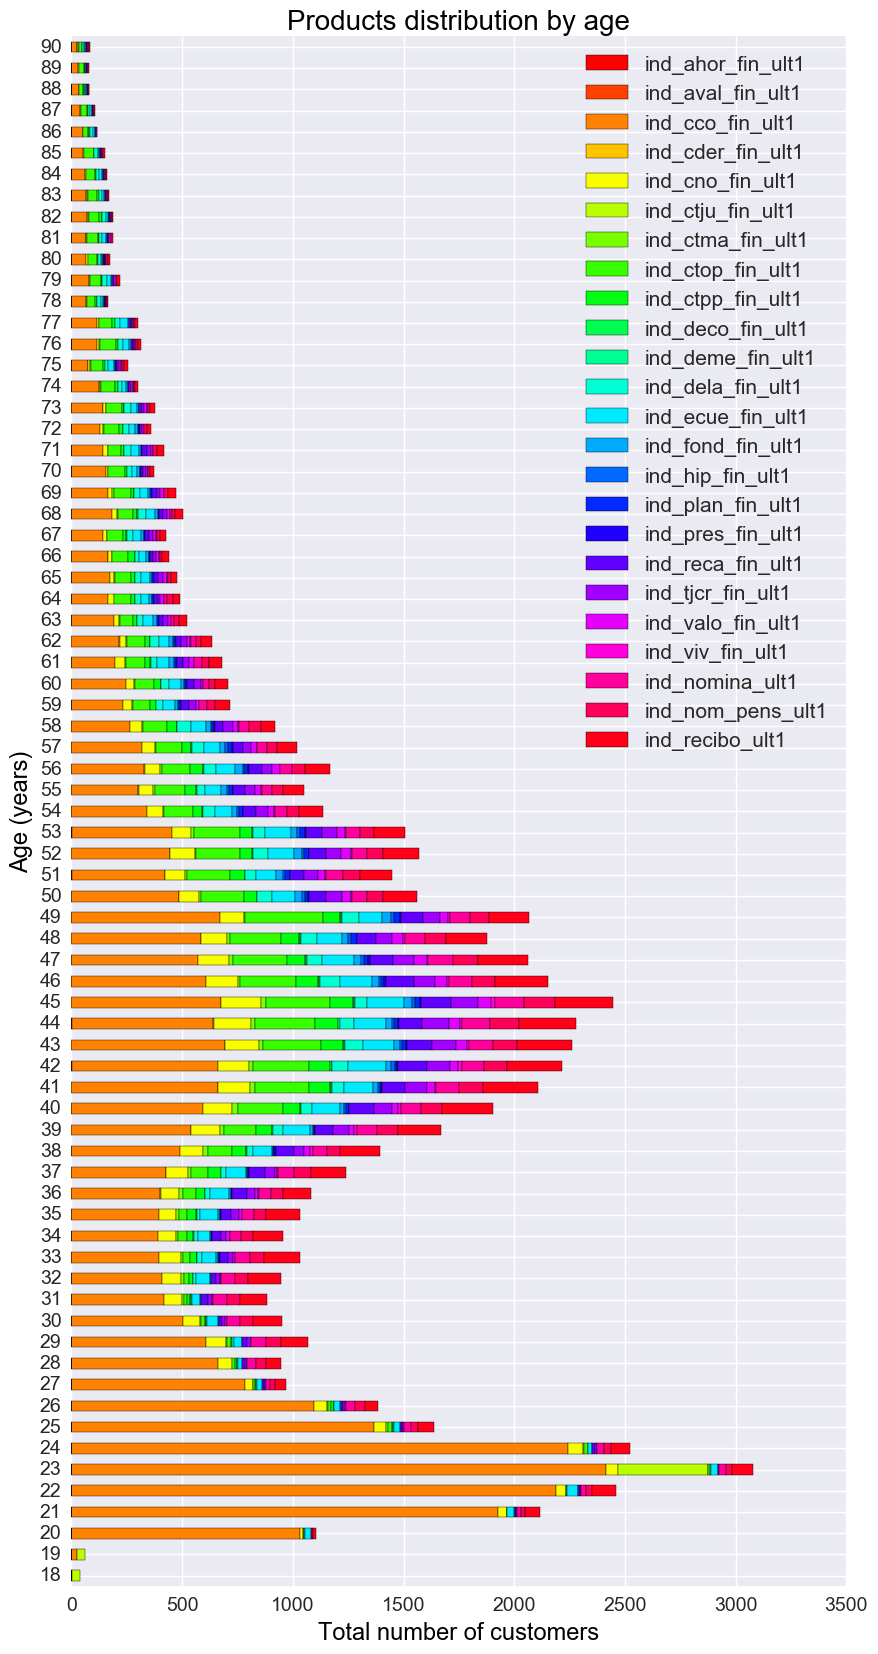

In [50]:
# Products distribution by age
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[10,20], colormap='hsv')
plt.title('Products distribution by age', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Age (years)', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [51]:
df["ind_nuevo"].isnull().sum()

0

For missing values in ind_nuevo we can fill in missing values by looking how many months of history these customers have.

In [53]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

nan

Looks like these are all new customers, so replace accordingly.

In [55]:
df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1

Missing values in Antiguedad

In [57]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

0

In [58]:
df.loc[df["antiguedad"].isnull(),"ind_nuevo"].describe()

count     0
unique    0
Name: ind_nuevo, dtype: int64

In [60]:
df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"] = 0

Some entries don't have the date they joined the company. I don't think that it is a very important date, just give them something in the middle of the pack (median)

In [62]:
dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
df["fecha_alta"].describe()

count         49046
unique         5783
top       10/3/2014
freq            208
Name: fecha_alta, dtype: object

Missing values in indrel, 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month). Fill in missing with the more common status? We have to find a package Recursive partitioning type to infer missing values (MICE in R or RPART in R type)

In [64]:
pd.Series([i for i in df.indrel]).value_counts()

1.0     48972
99.0       74
dtype: int64

In [65]:
df.loc[df.indrel.isnull(),"indrel"] = 1

tipodom doesn't seem to be useful (drop this), and I prefer the province code (is factorized) instead the name of the province in nomprov. We use nomprov for visualization purposes only. (PRINT DISTRIBUTION)

In [67]:
df.drop(["tipodom"],axis=1,inplace=True)

In [48]:
df["nomprov"].isnull().sum().value_counts()

AttributeError: 'numpy.int64' object has no attribute 'value_counts'

In [69]:
df["cod_prov"].isnull().sum()

0

Zero Value for NaN in cod_prov

In [71]:
unique_cod_prov = df["cod_prov"].unique()
unique_nomprov = df["nomprov"].unique()
df.loc[df.cod_prov.isnull(),"cod_prov"] = 0

A few values in ind_actividad_cliente are missing. We use the median.

In [73]:
np.sum(df["ind_actividad_cliente"].isnull())
df.loc[df.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
df["ind_actividad_cliente"].median()

In [74]:
df.renta.isnull().sum()

0

In [75]:
incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,MedianIncome
0,BIZKAIA,67183.980
1,AVILA,68041.725
2,BADAJOZ,68854.740
3,CIUDAD REAL,69181.200
4,"BALEARS, ILLES",71063.415


([<matplotlib.axis.YTick at 0x115ebe10>,
 <a list of 5 Text yticklabel objects>)

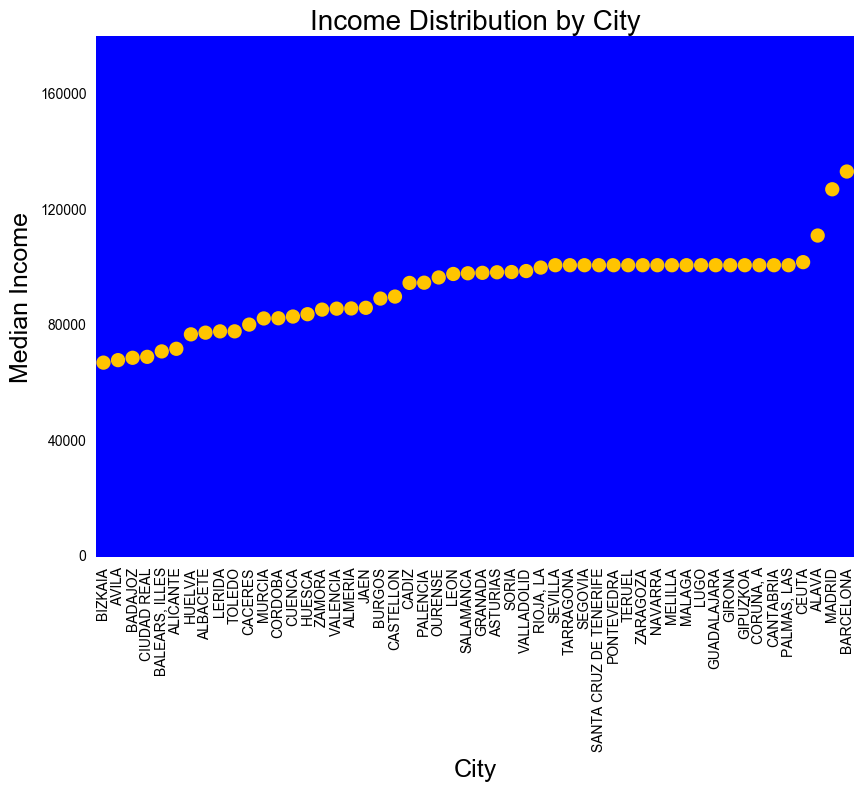

In [76]:
with sns.axes_style({
        "axes.facecolor":   "blue",
        "axes.grid"     :    False,
        "figure.facecolor": "white"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   color="#ffc400",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=10,labelcolor="black")#
plt.ylabel("Median Income",size=18,color="black")
plt.xlabel("City",size=18,color="black")
plt.title("Income Distribution by City",size=20,color="black")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

Drop nomprov column (cod_prov is the same column)

In [79]:
df.drop(["nomprov"],axis=1,inplace=True)

The next columns with missing data I'll look at are features, which are just a boolean indicator as to whether or not that product was owned that month. We assume that the bank has all his products purchases under control so missing values becomes 0 (not owed).

In [81]:
df.ind_nomina_ult1.isnull().sum()

0

In [82]:
df.ind_nom_pens_ult1.isnull().sum()

0

REVIEW :The values is assigned like float. Convert float value into int (Did it forward)

In [84]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

Last columns with missing values: 'ind_empleado', 'pais_residencia', 'sexo', 'ult_fec_cli_1t', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'segmento'

In [86]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

In [90]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
cod_prov                 False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela

In [ ]:
Convert the products feature columns into integer values

In [91]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)

In [96]:

usecols = ['ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
       
df_train = pd.read_csv("C:/Users/Jameel shaik/Documents/Santander Product Recommendation/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows,usecols=usecols)
df_test = pd.read_csv("C:/Users/Jameel shaik/Documents/Santander Product Recommendation/train_ver2.csv",dtype={"sexo":str,
         "ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str}, nrows=limit_rows,usecols=usecols)

sample = pd.read_csv('C:/Users/Jameel shaik/Documents/Santander Product Recommendation/sample_submission.csv')

df_train = df_train.drop_duplicates(['ncodpers'], keep='last')
#df_test = df_test.drop_duplicates(['ncodpers'], keep='last')
df_train.fillna(0, inplace=True)
#df_test.fillna(0, inplace=True)

# Not very sure just to keep with unique_ids 'cause principal id is fecha_dato + ncodpers and if we
# eliminate repeated ncodpers we lose some important information.
#We take unique_ids and unique fecha_datos just to play forward.
unique_ids   = pd.Series(df_train["ncodpers"].unique())

df_train.count()
unique_ids.count()
limit_people = 1e4
unique_id    = unique_ids.sample(n=limit_people)
df_train           = df_train[df_train.ncodpers.isin(unique_id)]

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2572: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


In [97]:
models = {}
id_preds = defaultdict(list)
ids = df_train['ncodpers'].values

#Delete in final model (Done before)
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)
# -------------------------------------------------------------------------------------------#    
for c in df_train.columns:
    if c != 'ncodpers':
        #print(c)
        y_train = df_train[c]
        x_train = df_train.drop([c, 'ncodpers'], 1)
        
        
for c in df_test.columns:
    if c != 'ncodpers':
        #print(c)
        x_test = df_test.drop([c, 'ncodpers'], 1) 
        x_test = x_test.fillna(method='ffill')

In [98]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
p_train = clf.predict_proba(x_train)[:,1]

In [99]:
models[c] = clf
for id, p in zip(ids, p_train):
      id_preds[id].append(p)
            
print(roc_auc_score(y_train, p_train))

0.857039292485


In [100]:
from sklearn import ensemble
clf2 = ensemble.ExtraTreesClassifier(n_estimators = 35, n_jobs = -1, max_depth = 12)
clf2.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=12, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
p_train3 = clf2.predict_proba(x_train)[:,1]

In [102]:
models[c] = clf2
for id, p in zip(ids, p_train3):
      id_preds[id].append(p)
            
print(roc_auc_score(y_train, p_train3))

0.868718334919


In [103]:
clf1 = ensemble.RandomForestClassifier(n_estimators=30, n_jobs=-1,max_depth=10, min_samples_split=10, verbose=1)
clf1.fit(x_train, y_train)
p_train1 = clf1.predict_proba(x_train)[:,1]

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished


In [104]:
models[c] = clf1
for id, p in zip(ids, p_train1):
      id_preds[id].append(p)
            
print(roc_auc_score(y_train, p_train1))

0.861583050791


In [105]:
#print(id_preds)
active_ = {}
for val in df_train.values:
    val = list(val)
    id = val.pop(0) ## pop ncodpers (customer id)
    ## active column
    active  = [c[0] for c in zip(df_train.columns[1:],val) if c[1] > 0]
    active_[id] = active
    
train_preds = {}
for id,val in id_preds.items():
    preds = [i[0] for i in sorted([i for i in zip(df_train.columns[1:],val) if i[0] not in active_[id]], key=lambda i:i [1], reverse=True)[:7]]
    train_preds[id] = preds


In [106]:
sample.values[0:5]

array([[103709, 'ind_tjcr_fin_ult1'],
       [103710, 'ind_tjcr_fin_ult1'],
       [103714, 'ind_tjcr_fin_ult1'],
       [103717, 'ind_tjcr_fin_ult1'],
       [103718, 'ind_tjcr_fin_ult1']], dtype=object)

In [107]:
train_preds

{1032192: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 606210: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 753668: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1045623: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1277959: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1179656: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 393225: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 983051: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 704526: ['ind_cco_fin_ult1', 'ind_aval_fin_ult1', 'ind_ahor_fin_ult1'],
 1198765: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 311313: ['ind_cco_fin_ult1', 'ind_aval_fin_ult1', 'ind_ahor_fin_ult1'],
 1196050: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1114132: ['ind_aval_fin_ult1', 'ind_ahor_fin_ult1', 'ind_cco_fin_ult1'],
 994020: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1228823: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1327128: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1392665: ['ind_cco_fin_ult1', 'ind_aval_fin_ult1', 'ind_ahor_fin_ult1'],
 1146906:

In [ ]:
test_preds = []
for row in sample.values:
    id = row[0]
    p = train_preds[id]
    test_preds.append(' '.join(p))

sample['added_products'] = test_preds
sample.to_csv('recommendation.csv',index=False)